In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
%matplotlib inline
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'sample_submission.csv']


In [2]:
train = pd.read_csv('../input/train.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Labels = train['label']
train = train.drop('label', axis=1)

In [5]:
#Converting our Dataframe to a matrix 
train_mat = train.as_matrix()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [6]:
Images = []
for i in tqdm(range(train_mat.shape[0])):
    im = train_mat[i]
    im = im.reshape((28,28))
    Images.append(im)

100%|██████████| 42000/42000 [00:00<00:00, 677296.55it/s]


In [7]:
Images = np.array(Images)

4


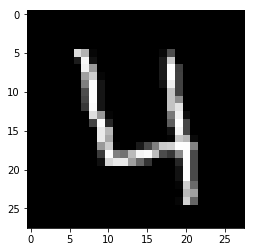

In [8]:
plt.imshow(Images[3], cmap='gray')
print(Labels[3])

In [9]:
Images = Images/255.

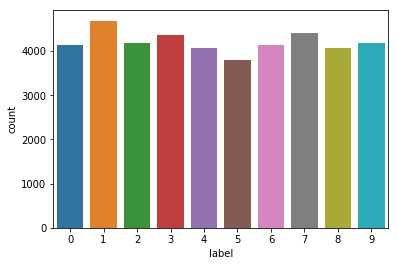

In [10]:
import seaborn as sns
sns.countplot(Labels)

In [11]:
from sklearn.model_selection import train_test_split
xtr, xv, ytr, yv = train_test_split(Images, Labels, random_state = 45, test_size=0.2)

In [12]:
xtr = xtr.reshape(xtr.shape[0],28,28,1)
xv = xv.reshape(xv.shape[0],28,28,1)

In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2, zoom_range=0.2)

train_gen.fit(xtr)

Using TensorFlow backend.


In [14]:
from keras.utils import to_categorical

ytr1 = to_categorical(ytr)
yv1 = to_categorical(yv)

yv1[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [15]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten, Dense, Activation
from keras import optimizers
from keras.models import Sequential

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [17]:
model.compile(optimizer=optimizers.Adam(lr=0.0001),loss = 'binary_crossentropy', metrics = ['accuracy'])

**We will use callbacks to stop epochs when the model performance stops to improove.**

In [18]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [19]:
history = model.fit(xtr, ytr1, validation_data=(xv, yv1)
                              , epochs=20
                              , batch_size=32
                             , callbacks=[es, mc])

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 14s 421us/step - loss: 0.0801 - acc: 0.9721 - val_loss: 0.0250 - val_acc: 0.9918

Epoch 00001: val_loss improved from inf to 0.02501, saving model to best_model.h5
Epoch 2/20
33600/33600 [==============================] - 8s 239us/step - loss: 0.0256 - acc: 0.9913 - val_loss: 0.0165 - val_acc: 0.9947

Epoch 00002: val_loss improved from 0.02501 to 0.01651, saving model to best_model.h5
Epoch 3/20
33600/33600 [==============================] - 8s 238us/step - loss: 0.0187 - acc: 0.9938 - val_loss: 0.0131 - val_acc: 0.9957

Epoch 00003: val_loss improved from 0.01651 to 0.01305, saving model to best_model.h5
Epoch 4/20
33600/33600 [==============================] - 8s 240us/step - loss: 0.0146 - acc: 0.9951 - val_loss: 0.0128 - val_acc: 0.9959

Epoch 00004: val_loss improved from 0.01305 to 0.01281, saving model to best_model.h5
Epoch 5/20
33600/33600 [==============================

In [20]:
from keras.models import load_model
final_model = load_model('best_model.h5')

In [21]:
test = pd.read_csv('../input/test.csv')

In [22]:
test_mat = test.as_matrix()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [23]:
Images_test = []
for i in tqdm(range(test_mat.shape[0])):
    im = test_mat[i]
    im = im.reshape((28,28))
    Images_test.append(im)

100%|██████████| 28000/28000 [00:00<00:00, 206134.35it/s]


In [24]:
Images_test = np.array(Images_test)

In [25]:
Images_test = Images_test.reshape(Images_test.shape[0],28,28,1)

In [26]:
predictions = final_model.predict(Images_test)

In [27]:
pred_labels = []

for i in predictions:
    l = np.argmax(i)
    pred_labels.append(l)

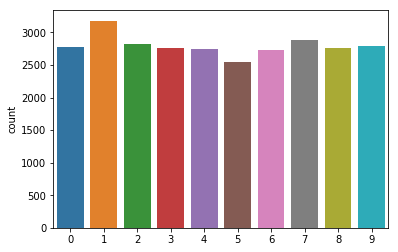

In [28]:
sns.countplot(pred_labels)

In [29]:
submission = pd.read_csv('../input/sample_submission.csv')

In [30]:
imageid = submission['ImageId']

In [31]:
data_final = {'ImageId': imageid, 'Label': pred_labels }

In [32]:
final_sub = pd.DataFrame(data=data_final)
final_sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [33]:
#Exporting to CSV for submission
final_sub.to_csv('final_submission.csv', sep=',', index=False)